In [3]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

reviews_df= pd.read_csv(r"C:\Users\avinash\Downloads\Amazon_Reviews.csv")
reviews_df.shape

reviews_df['Label']=reviews_df['Label'].map({'__label__2 ':1,'__label__1 ':0})

y=reviews_df['Label']

reviews_df.drop(columns='Label',axis=1,inplace=True)

X_train,X_test,y_train,y_test=train_test_split(reviews_df,y,random_state=42,test_size=0.2)
#X_train.iloc[0]


In [4]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer=PorterStemmer()


def preprocessing(review):
    
    final_tokens=' '
    tokens=tokenizer.tokenize(review)
    #print('Tokens:',tokens)
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    #print('Pure Tokens:',pure_tokens)
    lemmas_tokens=[stemmer.stem(pure_token) for pure_token in pure_tokens]
    
    final_tokens=final_tokens.join(lemmas_tokens)
    
    return final_tokens


#preprocessing('I was eating my breakfast when you were playing')
X_train['Cleaned_text']=X_train['Review'].apply(preprocessing)
X_train['Cleaned_text']


C:\Users\avinash\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


183    hand track hear far complet though miss memor ...
38     work mac clearli say line work mac os system d...
24     like album thought would heard song two though...
142    pattern detail sketch although excit purchas b...
141    contemporari fairytal sure delight book take c...
29     base review bought one glad vcr dvd earli chri...
19     size recomend size chart real size much smalle...
169    awesum best block ever toy grandson favorit fi...
127    one kind book timber frame build husband love ...
118    got fool know audio cd game thought could use ...
56     label memphi tn come reatard front cours wild ...
5      absolut masterpiec quit sure actual take time ...
122    good gave 5 star littl dog much fun ripe apart...
113    hour fun 4 6 year old purchas game year ago gi...
93     slow dull classic 1980 style movi 2 star 5 slo...
139    charisma henri dog daughter 6 gave henri love ...
95     worth time book wriiten horribl would never li...
171    great valu set incorpor 

In [45]:
vectorizer=TfidfVectorizer(stop_words='english',use_idf=True)

vectorizer.fit(X_train['Cleaned_text'])
X_train_TfIdf=vectorizer.transform(X_train['Cleaned_text'])

#vectorizer.get_feature_names()

C:\Users\mmarri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


0.8533333333333333

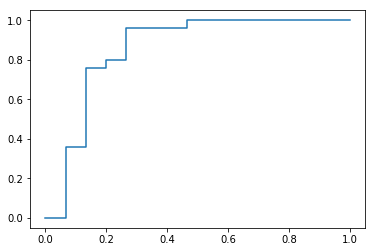

In [51]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt


clf = MultinomialNB().fit(X_train_TfIdf.toarray(),y_train)

#clf.score(X_train_TfIdf.toarray(),y_train)


#test_review= 'That product was its absolute best and I loved using every feature of it'
X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)

#processed_test_review
X_test_tfIdf=vectorizer.transform(X_test['Cleaned_text'])

y_pred=clf.predict(X_test_tfIdf.toarray())

confusion_matrix(y_test,y_pred)

y_proba_pred=clf.predict_proba(X_test_tfIdf.toarray())[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_proba_pred)

plt.plot(fpr,tpr)

roc_auc_score(y_test,y_proba_pred)

C:\Users\mmarri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8533333333333333

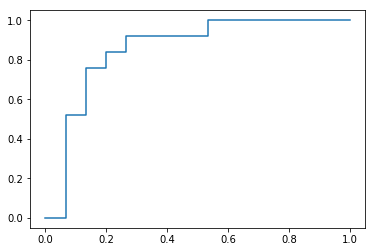

In [47]:
from sklearn.linear_model import  LogisticRegression

logit=LogisticRegression()
logit.fit(X_train_TfIdf,y_train)
y_logistic_pred=logit.predict(X_test_tfIdf)

y_logistic_proba_pred=logit.predict_proba(X_test_tfIdf.toarray())[::,1]

log_fpr,log_tpr,log_thresholds=roc_curve(y_test,y_logistic_proba_pred)

plt.plot(log_fpr,log_tpr)

roc_auc_score(y_test,y_logistic_proba_pred)


In [ ]:
from nltk import sent_tokenize,word_tokenize
data="the school is good to see in gg/.,,.[uhwwvwgwvqgss]"
print(word_tokenize(data))